In [2]:
# dataset: Salary_Data.csv
# location: https://mitu.co.in/dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
df.shape

(30, 2)

In [10]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

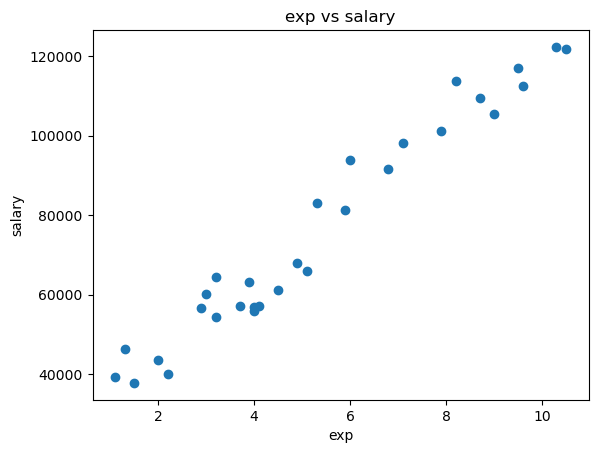

In [12]:
plt.title('exp vs salary')
plt.xlabel('exp')
plt.ylabel('salary')
plt.scatter(df['YearsExperience'], df['Salary']);

/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


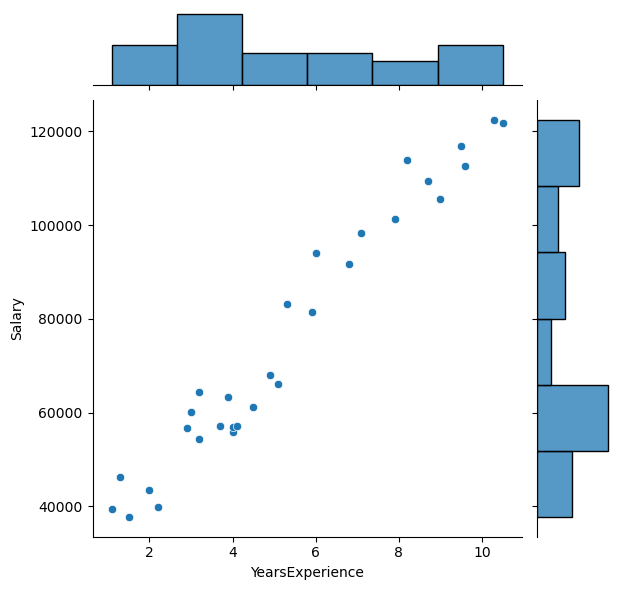

In [18]:
sns.jointplot(x = 'YearsExperience', y = 'Salary', data = df);

In [20]:
# input data

x = df['YearsExperience'].values   # converting the data into array

# output data
y = df['Salary']

In [22]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [24]:
x = x.reshape(30,1)

In [26]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

#### cross validation

In [29]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   random_state= 0,
                                                   test_size= 0.25)

In [58]:
x_train.shape

(22, 1)

In [60]:
y_train.shape

(22,)

#### Linear Reg

In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [67]:
lr.fit(x_train, y_train)

LinearRegression()

In [69]:
# predict on test set

y_pred = lr.predict(x_test)

In [71]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [73]:
# compare actual and predicted values

result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

result

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [75]:
# mean absolute error

sum(abs(y_test - y_pred)) / len(y_pred)

3508.5455930660555

In [77]:
# function
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22407940.143340684

In [81]:
# Actual accuracy/ r2 score/ coef of dwtermination

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9779208335417602

In [87]:
lr.score(x_test, y_test)

0.9779208335417602

In [89]:
lr.score(x, y)

0.955975487542377

In [83]:
lr.coef_

array([9379.71049195])

In [85]:
lr.intercept_

26986.691316737248

In [91]:
# prediction on the new data
lr.predict([[12]])

array([139543.21722009])

In [93]:
# y = mx + c

9379.71049195 * 12 + 26986.691316737248

139543.21722013725

### Best fit line

In [96]:
y_pred = lr.predict(x)

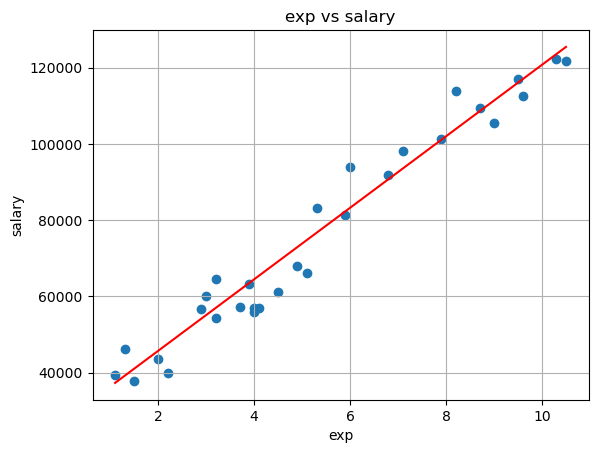

In [104]:
plt.title('exp vs salary')
plt.xlabel('exp')
plt.ylabel('salary')

plt.scatter(x, y);

plt.plot(x, y_pred, color = 'red')

plt.grid();